Create Dataset

In [1]:
using SyntheticDatasets
using Plots

include("../src/NNJulia.jl")
using .NNJulia

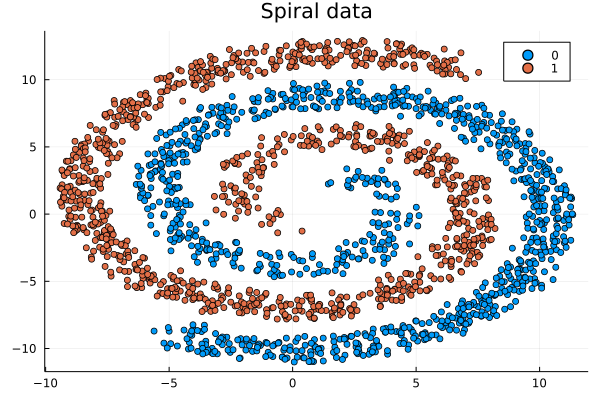

In [2]:
# load dataset
spirals = SyntheticDatasets.make_twospirals(n_samples = 2000, 
                                            start_degrees = 90,
                                            total_degrees = 570, 
                                            noise =1.9);


# plot dataset
scatter(spirals.feature_1,spirals.feature_2,group=spirals.label,title="Spiral data")

In [3]:
# extract inputs and labels from the dataset
xData = permutedims([spirals.feature_1 spirals.feature_2]) # 2x2000
yData = permutedims(spirals.label) #1x2000

# split the dataset into train and test sets
x_train,y_train,x_test,y_test = split_train_test(xData,yData,0.9)


([6.180406175981193 9.19125096568346 … 5.663043898445436 5.623642367262544; -3.4822319978713745 -4.711809078655593 … 4.201155939909064 3.388303821039019], [1 0 … 1 1], [0.042074665267221256 2.078025453450006 … -2.412723327560906 10.025803157348244; -3.226490295095074 12.597992396116753 … -10.096366403675198 3.8370899989869955], [0 1 … 0 0])

In [4]:
# Create the model
model = Sequential(
        Dense(2, 16, leakyrelu),
        Dense(16, 16, leakyrelu),
        Dense(16, 1, sigmoid),
    )

Sequential with : 3 layer


Dense: 2 --> 16
weight: (16, 2)
bias: (16,)
activation function: leakyrelu
Dense: 16 --> 16
weight: (16, 16)
bias: (16,)
activation function: leakyrelu
Dense: 16 --> 1
weight: (1, 16)
bias: (1,)
activation function: sigmoid


In [5]:
# Initialise the optimiser, the loss function and the metrics used to compute accuracy
opt = GradientDescent(0.01)
loss = BinaryCrossentropy()
metrics = BinaryAccuracy(0.8)

# Pass it to the TrainParameters struct that will be used during training
trainParams = TrainParameters(opt, loss, metrics)

# Training specifications
batchsize = 64
nbEpochs = 600

600

In [6]:
# Load the train data into a dataloader that will split the data
# into shuffled batches
trainData = DataLoader(x_train, y_train, batchsize,true)

DataLoader{Union{Float64, Int64, AbstractArray}, Union{Float64, Int64, AbstractArray}}([6.180406175981193 9.19125096568346 … 5.663043898445436 5.623642367262544; -3.4822319978713745 -4.711809078655593 … 4.201155939909064 3.388303821039019], [1 0 … 1 1], 64, [1, 65, 129, 193, 257, 321, 385, 449, 513, 577  …  1217, 1281, 1345, 1409, 1473, 1537, 1601, 1665, 1729, 1793], true, 29)

In [7]:
# train the model
history = train!(model, trainParams, trainData, nbEpochs)

Epoch 1 : accuracy = 0.5910560344827587, loss = 46.03329676542632
Epoch 2 : accuracy = 0.6050646551724138, loss = 23.543710146146456
Epoch 3 : accuracy = 0.6088362068965517, loss = 20.946882384365324
Epoch 4 : accuracy = 0.6271551724137931, loss = 19.9187704889219
Epoch 5 : accuracy = 0.6115301724137931, loss = 20.27661161444434
Epoch 6 : accuracy = 0.6045258620689655, loss = 19.92181981887018
Epoch 7 : accuracy = 0.6212284482758621, loss = 19.655835602623846
Epoch 8 : accuracy = 0.6104525862068966, loss = 19.411286769129006
Epoch 9 : accuracy = 0.6244612068965517, loss = 18.86112499706896
Epoch 10 : accuracy = 0.5991379310344828, loss = 19.42665574965694
Epoch 11 : accuracy = 0.6142241379310345, loss = 19.163518477228422
Epoch 12 : accuracy = 0.6109913793103449, loss = 19.024984092660098


Epoch 13 : accuracy = 0.5975215517241379, loss = 19.058775427835496
Epoch 14 : accuracy = 0.6002155172413793, loss = 18.83946176085772
Epoch 15 : accuracy = 0.6099137931034483, loss = 18.286701647333185
Epoch 16 : accuracy = 0.59375, loss = 19.400766176069244
Epoch 17 : accuracy = 0.6050646551724138, loss = 18.09410026931863
Epoch 18 : accuracy = 0.5980603448275862, loss = 18.868929202224127
Epoch 19 : accuracy = 0.6061422413793104, loss = 18.702072231081623
Epoch 20 : accuracy = 0.599676724137931, loss = 18.588691612824363
Epoch 21 : accuracy = 0.6066810344827587, loss = 18.328488937929315
Epoch 22 : accuracy = 0.5959051724137931, loss = 18.54614326816475
Epoch 23 : accuracy = 0.6169181034482759, loss = 18.05746361983421
Epoch 24 : accuracy = 0.59375, loss = 18.089012673111547
Epoch 25 : accuracy = 0.6223060344827587, loss = 18.162099050765175
Epoch 26 : accuracy = 0.6023706896551724, loss = 18.100630495281163
Epoch 27 : accuracy = 0.6147629310344828, loss = 18.08972701639993


Epoch 28 : accuracy = 0.6212284482758621, loss = 17.940589152166382
Epoch 29 : accuracy = 0.6104525862068966, loss = 17.567067321595907
Epoch 30 : accuracy = 0.5975215517241379, loss = 18.694205215093046
Epoch 31 : accuracy = 0.6029094827586207, loss = 18.2615216291411
Epoch 32 : accuracy = 0.6136853448275862, loss = 17.889249852827945
Epoch 33 : accuracy = 0.6088362068965517, loss = 17.63634578073214
Epoch 34 : accuracy = 0.615301724137931, loss = 17.637246471974542
Epoch 35 : accuracy = 0.6115301724137931, loss = 17.76355515183567
Epoch 36 : accuracy = 0.6056034482758621, loss = 17.80753443734619
Epoch 37 : accuracy = 0.6126077586206896, loss = 17.692235226731288
Epoch 38 : accuracy = 0.603448275862069, loss = 17.724932431637882
Epoch 39 : accuracy = 0.6158405172413793, loss = 17.631986652294643
Epoch 40 : accuracy = 0.6142241379310345, loss = 17.380095127934116
Epoch 41 : accuracy = 0.6072198275862069, loss = 17.616409614299222
Epoch 42 : accuracy = 0.6136853448275862, loss = 17.713

Epoch 43 : accuracy = 0.6072198275862069, loss = 17.455122655073684
Epoch 44 : accuracy = 0.6163793103448276, loss = 17.516925733298287
Epoch 45 : accuracy = 0.6228448275862069, loss = 17.0800933232383
Epoch 46 : accuracy = 0.6050646551724138, loss = 17.809547101920742
Epoch 47 : accuracy = 0.6061422413793104, loss = 17.47112655613175
Epoch 48 : accuracy = 0.6072198275862069, loss = 17.60704539423157
Epoch 49 : accuracy = 0.6023706896551724, loss = 17.46686281021419
Epoch 50 : accuracy = 0.619073275862069, loss = 17.242856294470766
Epoch 51 : accuracy = 0.6099137931034483, loss = 17.203553021093267
Epoch 52 : accuracy = 0.615301724137931, loss = 17.082582597131765
Epoch 53 : accuracy = 0.6115301724137931, loss = 17.29315266762477
Epoch 54 : accuracy = 0.615301724137931, loss = 17.255590939059992
Epoch 55 : accuracy = 0.6142241379310345, loss = 17.008474668266327
Epoch 56 : accuracy = 0.6233836206896551, loss = 17.26834933345873
Epoch 57 : accuracy = 0.6056034482758621, loss = 17.091670

Epoch 59 : accuracy = 0.6163793103448276, loss = 16.883220818535563
Epoch 60 : accuracy = 0.6077586206896551, loss = 17.46696627557824
Epoch 61 : accuracy = 0.6029094827586207, loss = 17.26463721153443
Epoch 62 : accuracy = 0.6120689655172413, loss = 17.129707124003364
Epoch 63 : accuracy = 0.6163793103448276, loss = 17.00832385045955
Epoch 64 : accuracy = 0.6271551724137931, loss = 16.927036390250823
Epoch 65 : accuracy = 0.6126077586206896, loss = 17.108526578527933
Epoch 66 : accuracy = 0.6217672413793104, loss = 16.963415256278093
Epoch 67 : accuracy = 0.6217672413793104, loss = 17.006436050683938
Epoch 68 : accuracy = 0.6077586206896551, loss = 17.079701884321832
Epoch 69 : accuracy = 0.6050646551724138, loss = 17.11824549512232
Epoch 70 : accuracy = 0.6142241379310345, loss = 16.81375270883176
Epoch 71 : accuracy = 0.6136853448275862, loss = 16.97917917791684
Epoch 72 : accuracy = 0.6233836206896551, loss = 16.940729941567685
Epoch 73 : accuracy = 0.6066810344827587, loss = 16.81

Epoch 76 : accuracy = 0.6174568965517241, loss = 16.727317343838955
Epoch 77 : accuracy = 0.6174568965517241, loss = 16.94257353941179
Epoch 78 : accuracy = 0.6007543103448276, loss = 16.74226733202131
Epoch 79 : accuracy = 0.615301724137931, loss = 16.69990806559389
Epoch 80 : accuracy = 0.6136853448275862, loss = 16.785702347231048
Epoch 81 : accuracy = 0.619073275862069, loss = 16.744742665845525
Epoch 82 : accuracy = 0.6061422413793104, loss = 16.721616849551907
Epoch 83 : accuracy = 0.6088362068965517, loss = 16.684693428949025
Epoch 84 : accuracy = 0.6142241379310345, loss = 16.784073246374124
Epoch 85 : accuracy = 0.6142241379310345, loss = 16.681844807438182
Epoch 86 : accuracy = 0.6126077586206896, loss = 16.582777892655404
Epoch 87 : accuracy = 0.6126077586206896, loss = 16.504247754498806
Epoch 88 : accuracy = 0.609375, loss = 16.31842701419871
Epoch 89 : accuracy = 0.6158405172413793, loss = 16.802165130612494
Epoch 90 : accuracy = 0.6099137931034483, loss = 16.577617065373

Epoch 92 : accuracy = 0.6082974137931034, loss = 16.44126961210198
Epoch 93 : accuracy = 0.6142241379310345, loss = 16.48896783371534
Epoch 94 : accuracy = 0.6147629310344828, loss = 16.263991418289052
Epoch 95 : accuracy = 0.6169181034482759, loss = 16.306742309617
Epoch 96 : accuracy = 0.6136853448275862, loss = 16.462605345471882
Epoch 97 : accuracy = 0.6142241379310345, loss = 16.350571020307637
Epoch 98 : accuracy = 0.6088362068965517, loss = 16.355190485864558
Epoch 99 : accuracy = 0.6228448275862069, loss = 16.217152199078214
Epoch 100 : accuracy = 0.6115301724137931, loss = 16.2830560676989
Epoch 101 : accuracy = 0.615301724137931, loss = 16.417475412647736
Epoch 102 : accuracy = 0.6206896551724138, loss = 16.177893366724977
Epoch 103 : accuracy = 0.6099137931034483, loss = 16.403562624880774
Epoch 104 : accuracy = 0.6212284482758621, loss = 16.347787622987553
Epoch 105 : accuracy = 0.6126077586206896, loss = 16.120841611647183
Epoch 106 : accuracy = 0.6174568965517241, loss = 

Epoch 108 : accuracy = 0.6179956896551724, loss = 16.065336434956503
Epoch 109 : accuracy = 0.6169181034482759, loss = 16.241666052967286
Epoch 110 : accuracy = 0.6099137931034483, loss = 16.06299092339682
Epoch 111 : accuracy = 0.6185344827586207, loss = 16.03998633722321
Epoch 112 : accuracy = 0.6217672413793104, loss = 15.924390703733302
Epoch 113 : accuracy = 0.6233836206896551, loss = 15.984507131774027
Epoch 114 : accuracy = 0.6217672413793104, loss = 16.011009039241248
Epoch 115 : accuracy = 0.6158405172413793, loss = 15.863024070146949
Epoch 116 : accuracy = 0.6174568965517241, loss = 15.658060498332228
Epoch 117 : accuracy = 0.6298491379310345, loss = 15.748611850037063
Epoch 118 : accuracy = 0.6056034482758621, loss = 15.854087178261306
Epoch 119 : accuracy = 0.630926724137931, loss = 15.768074023781995
Epoch 120 : accuracy = 0.6368534482758621, loss = 15.808354480784555
Epoch 121 : accuracy = 0.6233836206896551, loss = 15.914238742969722
Epoch 122 : accuracy = 0.622306034482

Epoch 124 : accuracy = 0.6169181034482759, loss = 15.686837247726675
Epoch 125 : accuracy = 0.6223060344827587, loss = 15.600919711057259
Epoch 126 : accuracy = 0.6255387931034483, loss = 15.719633616119276
Epoch 127 : accuracy = 0.6255387931034483, loss = 15.561384274533365
Epoch 128 : accuracy = 0.619073275862069, loss = 15.570773177014127
Epoch 129 : accuracy = 0.6228448275862069, loss = 15.526580436704615
Epoch 130 : accuracy = 0.6212284482758621, loss = 15.547536428428348
Epoch 131 : accuracy = 0.6217672413793104, loss = 15.3836644656697
Epoch 132 : accuracy = 0.6239224137931034, loss = 15.486257688133646
Epoch 133 : accuracy = 0.6217672413793104, loss = 15.483079640279422
Epoch 134 : accuracy = 0.6239224137931034, loss = 15.212086932922519
Epoch 135 : accuracy = 0.6293103448275862, loss = 15.376211825412286
Epoch 136 : accuracy = 0.6244612068965517, loss = 15.29911072281263
Epoch 137 : accuracy = 0.6293103448275862, loss = 15.25411334151929
Epoch 138 : accuracy = 0.62284482758620

Epoch 140 : accuracy = 0.6223060344827587, loss = 15.024941900608795
Epoch 141 : accuracy = 0.6206896551724138, loss = 15.31685242123653
Epoch 142 : accuracy = 0.6395474137931034, loss = 14.995268914356004
Epoch 143 : accuracy = 0.6179956896551724, loss = 14.971319862474648
Epoch 144 : accuracy = 0.6282327586206896, loss = 14.806454069217198
Epoch 145 : accuracy = 0.6255387931034483, loss = 15.209367606558681
Epoch 146 : accuracy = 0.6314655172413793, loss = 14.87607140413217
Epoch 147 : accuracy = 0.6276939655172413, loss = 14.868880835724463
Epoch 148 : accuracy = 0.6379310344827587, loss = 14.898680293164725
Epoch 149 : accuracy = 0.6320043103448276, loss = 14.851879537859604
Epoch 150 : accuracy = 0.6330818965517241, loss = 14.7597498657045
Epoch 151 : accuracy = 0.6357758620689655, loss = 14.7312306991808
Epoch 152 : accuracy = 0.6303879310344828, loss = 14.808646008744478
Epoch 153 : accuracy = 0.6330818965517241, loss = 14.666821578544797
Epoch 154 : accuracy = 0.632543103448275

Epoch 157 : accuracy = 0.6373922413793104, loss = 14.527264209692238
Epoch 158 : accuracy = 0.6363146551724138, loss = 14.580151567390905
Epoch 159 : accuracy = 0.6336206896551724, loss = 14.491009510224188
Epoch 160 : accuracy = 0.6422413793103449, loss = 14.51934602383997
Epoch 161 : accuracy = 0.6357758620689655, loss = 14.49079978366427
Epoch 162 : accuracy = 0.6314655172413793, loss = 14.573337771359265
Epoch 163 : accuracy = 0.6492456896551724, loss = 14.407710916984412
Epoch 164 : accuracy = 0.6390086206896551, loss = 14.41438073053701
Epoch 165 : accuracy = 0.6330818965517241, loss = 14.293772268117788
Epoch 166 : accuracy = 0.6427801724137931, loss = 14.164124014214769
Epoch 167 : accuracy = 0.6567887931034483, loss = 14.219987740122763
Epoch 168 : accuracy = 0.6438577586206896, loss = 14.201923959164981
Epoch 169 : accuracy = 0.6470905172413793, loss = 14.16795055593606
Epoch 170 : accuracy = 0.6443965517241379, loss = 14.07765710890253
Epoch 171 : accuracy = 0.65301724137931

Epoch 173 : accuracy = 0.646551724137931, loss = 14.074630382174133
Epoch 174 : accuracy = 0.650323275862069, loss = 14.090846702007083
Epoch 175 : accuracy = 0.6433189655172413, loss = 14.111635648770699
Epoch 176 : accuracy = 0.6551724137931034, loss = 13.956170340678938
Epoch 177 : accuracy = 0.6530172413793104, loss = 13.658278095807594
Epoch 178 : accuracy = 0.6492456896551724, loss = 13.894966537188518
Epoch 179 : accuracy = 0.6610991379310345, loss = 13.670521271972753
Epoch 180 : accuracy = 0.6497844827586207, loss = 13.67928077084059
Epoch 181 : accuracy = 0.65625, loss = 13.510924508226617
Epoch 182 : accuracy = 0.6557112068965517, loss = 13.510144314241424
Epoch 183 : accuracy = 0.6557112068965517, loss = 13.583366062252384
Epoch 184 : accuracy = 0.6514008620689655, loss = 13.462231911833557
Epoch 185 : accuracy = 0.6627155172413793, loss = 13.454969152517112
Epoch 186 : accuracy = 0.6557112068965517, loss = 13.260849267804337
Epoch 187 : accuracy = 0.6573275862068966, loss 

Epoch 189 : accuracy = 0.6535560344827587, loss = 13.204808260573861
Epoch 190 : accuracy = 0.6600215517241379, loss = 13.241273603694495
Epoch 191 : accuracy = 0.6610991379310345, loss = 13.126091683014053
Epoch 192 : accuracy = 0.6530172413793104, loss = 13.192861203709409
Epoch 193 : accuracy = 0.6589439655172413, loss = 12.929242263465843
Epoch 194 : accuracy = 0.6691810344827587, loss = 12.912323998948013
Epoch 195 : accuracy = 0.6567887931034483, loss = 13.197765916714404
Epoch 196 : accuracy = 0.6637931034482759, loss = 13.073026126671795
Epoch 197 : accuracy = 0.6573275862068966, loss = 12.763489024589747
Epoch 198 : accuracy = 0.6610991379310345, loss = 12.86402480363477
Epoch 199 : accuracy = 0.6546336206896551, loss = 12.944245970380939
Epoch 200 : accuracy = 0.6616379310344828, loss = 12.974800220072934
Epoch 201 : accuracy = 0.6627155172413793, loss = 12.68379313894989
Epoch 202 : accuracy = 0.6670258620689655, loss = 12.688351816578395
Epoch 203 : accuracy = 0.66002155172

Epoch 204 : accuracy = 0.6670258620689655, loss = 12.598196319268059
Epoch 205 : accuracy = 0.6761853448275862, loss = 12.41461001718986
Epoch 206 : accuracy = 0.6632543103448276, loss = 12.560598792157748
Epoch 207 : accuracy = 0.6697198275862069, loss = 12.282286187943466
Epoch 208 : accuracy = 0.6783405172413793, loss = 12.271502149931537
Epoch 209 : accuracy = 0.6643318965517241, loss = 12.502943628358373
Epoch 210 : accuracy = 0.6691810344827587, loss = 12.119365477845307
Epoch 211 : accuracy = 0.6681034482758621, loss = 12.802734747708154
Epoch 212 : accuracy = 0.6740301724137931, loss = 12.095700194789087
Epoch 213 : accuracy = 0.6794181034482759, loss = 12.121383117668643
Epoch 214 : accuracy = 0.6761853448275862, loss = 12.247993626765572
Epoch 215 : accuracy = 0.6729525862068966, loss = 12.060928541542136
Epoch 216 : accuracy = 0.6783405172413793, loss = 11.953546590993458
Epoch 217 : accuracy = 0.6799568965517241, loss = 11.97633530921305
Epoch 218 : accuracy = 0.67941810344

Epoch 221 : accuracy = 0.6858836206896551, loss = 11.728853848057481
Epoch 222 : accuracy = 0.6783405172413793, loss = 11.717550386907812
Epoch 223 : accuracy = 0.6848060344827587, loss = 11.695589517001554
Epoch 224 : accuracy = 0.6853448275862069, loss = 11.834779767512405
Epoch 225 : accuracy = 0.6880387931034483, loss = 11.607458217381124
Epoch 226 : accuracy = 0.6821120689655172, loss = 11.539782503400794
Epoch 227 : accuracy = 0.6880387931034483, loss = 11.415616074986003
Epoch 228 : accuracy = 0.6998922413793104, loss = 11.350652225403937
Epoch 229 : accuracy = 0.6826508620689655, loss = 11.440989479749152
Epoch 230 : accuracy = 0.6891163793103449, loss = 11.483491278511815
Epoch 231 : accuracy = 0.6928879310344828, loss = 10.988544657767063
Epoch 232 : accuracy = 0.6821120689655172, loss = 11.617627610984421
Epoch 233 : accuracy = 0.693426724137931, loss = 11.12024485701367
Epoch 234 : accuracy = 0.6875, loss = 11.440532257065804
Epoch 235 : accuracy = 0.697198275862069, loss =

Epoch 237 : accuracy = 0.6977370689655172, loss = 11.126810136325606
Epoch 238 : accuracy = 0.7063577586206896, loss = 10.82271725875217
Epoch 239 : accuracy = 0.7015086206896551, loss = 11.089800599860647
Epoch 240 : accuracy = 0.703125, loss = 10.988569627934073
Epoch 241 : accuracy = 0.6977370689655172, loss = 10.739686395896326
Epoch 242 : accuracy = 0.697198275862069, loss = 11.510329240588957
Epoch 243 : accuracy = 0.7139008620689655, loss = 10.704864508148479
Epoch 244 : accuracy = 0.7085129310344828, loss = 11.123911567713446
Epoch 245 : accuracy = 0.7182112068965517, loss = 10.577766794554325
Epoch 246 : accuracy = 0.7047413793103449, loss = 11.012042103203315
Epoch 247 : accuracy = 0.7068965517241379, loss = 10.821802523845847
Epoch 248 : accuracy = 0.7235991379310345, loss = 10.337326308045737
Epoch 249 : accuracy = 0.7289870689655172, loss = 10.457001694032844
Epoch 250 : accuracy = 0.7268318965517241, loss = 10.189884054146855
Epoch 251 : accuracy = 0.7225215517241379, los

Epoch 254 : accuracy = 0.7392241379310345, loss = 10.18417610804185
Epoch 255 : accuracy = 0.7295258620689655, loss = 10.262670287920828
Epoch 256 : accuracy = 0.7381465517241379, loss = 10.034301243330411
Epoch 257 : accuracy = 0.7370689655172413, loss = 10.313290535490193
Epoch 258 : accuracy = 0.7381465517241379, loss = 10.205764062891388
Epoch 259 : accuracy = 0.7419181034482759, loss = 10.106966326711968
Epoch 260 : accuracy = 0.7526939655172413, loss = 9.961879582513475
Epoch 261 : accuracy = 0.734375, loss = 10.054199899503226
Epoch 262 : accuracy = 0.7354525862068966, loss = 9.98946945581952
Epoch 263 : accuracy = 0.7386853448275862, loss = 9.976628495227368
Epoch 264 : accuracy = 0.7478448275862069, loss = 9.728969996247383
Epoch 265 : accuracy = 0.7537715517241379, loss = 9.592087596645866
Epoch 266 : accuracy = 0.75, loss = 9.65527949783752
Epoch 267 : accuracy = 0.7537715517241379, loss = 9.551313544172332
Epoch 268 : accuracy = 0.755926724137931, loss = 9.729919603486115
E

Epoch 270 : accuracy = 0.7548491379310345, loss = 9.625996445387228
Epoch 271 : accuracy = 0.759698275862069, loss = 9.331066230229952
Epoch 272 : accuracy = 0.7473060344827587, loss = 9.935167952900755
Epoch 273 : accuracy = 0.7580818965517241, loss = 9.43737972900081
Epoch 274 : accuracy = 0.7521551724137931, loss = 9.693123087240455
Epoch 275 : accuracy = 0.7677801724137931, loss = 9.189577106005801
Epoch 276 : accuracy = 0.7537715517241379, loss = 9.387083768511511
Epoch 277 : accuracy = 0.7634698275862069, loss = 9.194128918491565
Epoch 278 : accuracy = 0.7618534482758621, loss = 9.321872330461414
Epoch 279 : accuracy = 0.7570043103448276, loss = 9.322281147849449
Epoch 280 : accuracy = 0.7613146551724138, loss = 9.08263697256619
Epoch 281 : accuracy = 0.7688577586206896, loss = 9.377126593927164
Epoch 282 : accuracy = 0.7618534482758621, loss = 9.235764092202784
Epoch 283 : accuracy = 0.7661637931034483, loss = 9.06712566809301
Epoch 284 : accuracy = 0.7677801724137931, loss = 9.

Epoch 286 : accuracy = 0.7672413793103449, loss = 9.128120288497122
Epoch 287 : accuracy = 0.7634698275862069, loss = 9.068433758186208
Epoch 288 : accuracy = 0.7737068965517241, loss = 8.861427108414796
Epoch 289 : accuracy = 0.7726293103448276, loss = 8.861088152330717
Epoch 290 : accuracy = 0.7640086206896551, loss = 9.237079308741054
Epoch 291 : accuracy = 0.7650862068965517, loss = 8.996218711763188
Epoch 292 : accuracy = 0.775323275862069, loss = 9.001718772223802
Epoch 293 : accuracy = 0.775323275862069, loss = 9.064216032351348
Epoch 294 : accuracy = 0.7742456896551724, loss = 8.704997335880849
Epoch 295 : accuracy = 0.7731681034482759, loss = 9.070836339632006
Epoch 296 : accuracy = 0.7839439655172413, loss = 8.532876359703481
Epoch 297 : accuracy = 0.787176724137931, loss = 8.494754697933104
Epoch 298 : accuracy = 0.7780172413793104, loss = 8.602179951077
Epoch 299 : accuracy = 0.7839439655172413, loss = 8.60477599374817
Epoch 300 : accuracy = 0.7866379310344828, loss = 8.431

Epoch 302 : accuracy = 0.787176724137931, loss = 8.55023837087544
Epoch 303 : accuracy = 0.7807112068965517, loss = 8.656255178946697
Epoch 304 : accuracy = 0.787176724137931, loss = 8.392009431654115
Epoch 305 : accuracy = 0.7844827586206896, loss = 8.42098638758682
Epoch 306 : accuracy = 0.7834051724137931, loss = 8.740375506161035
Epoch 307 : accuracy = 0.7839439655172413, loss = 8.40897286217987
Epoch 308 : accuracy = 0.7925646551724138, loss = 8.286876184271895
Epoch 309 : accuracy = 0.7877155172413793, loss = 8.196086471795786
Epoch 310 : accuracy = 0.787176724137931, loss = 8.392380650439357
Epoch 311 : accuracy = 0.7914870689655172, loss = 8.180104342859527
Epoch 312 : accuracy = 0.7882543103448276, loss = 8.07443452484165
Epoch 313 : accuracy = 0.7931034482758621, loss = 8.153635636810659
Epoch 314 : accuracy = 0.7925646551724138, loss = 7.991457636302816
Epoch 315 : accuracy = 0.7957974137931034, loss = 7.9196917286866615
Epoch 316 : accuracy = 0.7963362068965517, loss = 8.13

Epoch 317 : accuracy = 0.7925646551724138, loss = 8.021146755041586
Epoch 318 : accuracy = 0.7990301724137931, loss = 7.956513015707184
Epoch 319 : accuracy = 0.7936422413793104, loss = 7.945492346945327
Epoch 320 : accuracy = 0.7839439655172413, loss = 8.079640743565532
Epoch 321 : accuracy = 0.7952586206896551, loss = 7.8061474653469025
Epoch 322 : accuracy = 0.7995689655172413, loss = 7.81348048152663
Epoch 323 : accuracy = 0.7914870689655172, loss = 7.83640134327679
Epoch 324 : accuracy = 0.8011853448275862, loss = 7.60267553882877
Epoch 325 : accuracy = 0.7952586206896551, loss = 7.911236678266328
Epoch 326 : accuracy = 0.7979525862068966, loss = 7.7278855939498605
Epoch 327 : accuracy = 0.8001077586206896, loss = 7.6324056780259975
Epoch 328 : accuracy = 0.7990301724137931, loss = 7.48549250522538
Epoch 329 : accuracy = 0.7947198275862069, loss = 8.06531332467652
Epoch 330 : accuracy = 0.8054956896551724, loss = 7.569008861257428
Epoch 331 : accuracy = 0.8017241379310345, loss = 

Epoch 332 : accuracy = 0.8119612068965517, loss = 7.297645999133063
Epoch 333 : accuracy = 0.8103448275862069, loss = 7.250514490373253
Epoch 334 : accuracy = 0.8044181034482759, loss = 7.390903684272004
Epoch 335 : accuracy = 0.8054956896551724, loss = 7.162674630021764
Epoch 336 : accuracy = 0.8092672413793104, loss = 7.103025085078904
Epoch 337 : accuracy = 0.8092672413793104, loss = 7.109884163189316
Epoch 338 : accuracy = 0.8130387931034483, loss = 7.201051321941755
Epoch 339 : accuracy = 0.8173491379310345, loss = 7.02632748047369
Epoch 340 : accuracy = 0.818426724137931, loss = 6.9746005055390565
Epoch 341 : accuracy = 0.8178879310344828, loss = 6.879328272504088
Epoch 342 : accuracy = 0.8157327586206896, loss = 7.1104018670091484
Epoch 343 : accuracy = 0.8125, loss = 7.046580255362138
Epoch 344 : accuracy = 0.8243534482758621, loss = 6.8781087035323525
Epoch 345 : accuracy = 0.8205818965517241, loss = 6.831633820982406
Epoch 346 : accuracy = 0.8265086206896551, loss = 6.7286697

Epoch 348 : accuracy = 0.8189655172413793, loss = 6.828897070257343
Epoch 349 : accuracy = 0.818426724137931, loss = 6.721354782748261
Epoch 350 : accuracy = 0.8243534482758621, loss = 6.758944372145683
Epoch 351 : accuracy = 0.8259698275862069, loss = 6.740127512474845
Epoch 352 : accuracy = 0.8286637931034483, loss = 6.488627787261292
Epoch 353 : accuracy = 0.822198275862069, loss = 6.6789361427341545
Epoch 354 : accuracy = 0.8238146551724138, loss = 6.364932781897601
Epoch 355 : accuracy = 0.8324353448275862, loss = 6.697224354945299
Epoch 356 : accuracy = 0.8243534482758621, loss = 6.540230934581099
Epoch 357 : accuracy = 0.834051724137931, loss = 6.434228317734039
Epoch 358 : accuracy = 0.8329741379310345, loss = 6.369065931283499
Epoch 359 : accuracy = 0.8130387931034483, loss = 6.325856801308437
Epoch 360 : accuracy = 0.822198275862069, loss = 6.48113044702175
Epoch 361 : accuracy = 0.8383620689655172, loss = 6.260661964784869
Epoch 362 : accuracy = 0.8405172413793104, loss = 6.

Epoch 363 : accuracy = 0.8351293103448276, loss = 6.118579375586854
Epoch 364 : accuracy = 0.8329741379310345, loss = 6.186795321521528
Epoch 365 : accuracy = 0.8405172413793104, loss = 6.134358944211922
Epoch 366 : accuracy = 0.8383620689655172, loss = 5.9585015251748725
Epoch 367 : accuracy = 0.8383620689655172, loss = 6.0727964828748835
Epoch 368 : accuracy = 0.837823275862069, loss = 6.1413846950487825
Epoch 369 : accuracy = 0.8410560344827587, loss = 6.052359526874235
Epoch 370 : accuracy = 0.8399784482758621, loss = 5.972474151030043
Epoch 371 : accuracy = 0.8448275862068966, loss = 5.790139535041504
Epoch 372 : accuracy = 0.8415948275862069, loss = 5.996348270882147
Epoch 373 : accuracy = 0.8459051724137931, loss = 5.887411820232635
Epoch 374 : accuracy = 0.8415948275862069, loss = 5.7165801390657185
Epoch 375 : accuracy = 0.8405172413793104, loss = 5.926615768532342
Epoch 376 : accuracy = 0.8523706896551724, loss = 5.759452904147777
Epoch 377 : accuracy = 0.8415948275862069, lo

Epoch 378 : accuracy = 0.84375, loss = 5.83035960447696
Epoch 379 : accuracy = 0.8469827586206896, loss = 5.687665406062994
Epoch 380 : accuracy = 0.8502155172413793, loss = 5.575772742615697
Epoch 381 : accuracy = 0.8459051724137931, loss = 5.627489980133724
Epoch 382 : accuracy = 0.8426724137931034, loss = 5.7962157525860425
Epoch 383 : accuracy = 0.8432112068965517, loss = 5.5918688084314025
Epoch 384 : accuracy = 0.8491379310344828, loss = 5.526965346514046
Epoch 385 : accuracy = 0.8545258620689655, loss = 5.481331527017972
Epoch 386 : accuracy = 0.8485991379310345, loss = 5.506895326780946
Epoch 387 : accuracy = 0.8399784482758621, loss = 5.645016225879899
Epoch 388 : accuracy = 0.8566810344827587, loss = 5.429251204362025
Epoch 389 : accuracy = 0.8399784482758621, loss = 5.726985436001941
Epoch 390 : accuracy = 0.8577586206896551, loss = 5.331391461937106
Epoch 391 : accuracy = 0.8572198275862069, loss = 5.407659275844651
Epoch 392 : accuracy = 0.8588362068965517, loss = 5.357625

Epoch 394 : accuracy = 0.8604525862068966, loss = 5.30697393605484
Epoch 395 : accuracy = 0.8566810344827587, loss = 5.224406047822601
Epoch 396 : accuracy = 0.859375, loss = 5.201992341073556
Epoch 397 : accuracy = 0.8609913793103449, loss = 5.169798856736184
Epoch 398 : accuracy = 0.8631465517241379, loss = 5.14573849987108
Epoch 399 : accuracy = 0.8604525862068966, loss = 5.121712174894008
Epoch 400 : accuracy = 0.8642241379310345, loss = 5.153947647956192
Epoch 401 : accuracy = 0.865301724137931, loss = 5.090442675416207
Epoch 402 : accuracy = 0.8615301724137931, loss = 5.021651750366725
Epoch 403 : accuracy = 0.869073275862069, loss = 5.0695496384875485
Epoch 404 : accuracy = 0.8663793103448276, loss = 4.908366500789577
Epoch 405 : accuracy = 0.8620689655172413, loss = 5.076591755791491
Epoch 406 : accuracy = 0.8712284482758621, loss = 4.879482990260966
Epoch 407 : accuracy = 0.8696120689655172, loss = 4.869608857355988
Epoch 408 : accuracy = 0.8674568965517241, loss = 4.834940483

Epoch 409 : accuracy = 0.8663793103448276, loss = 4.806507705501983
Epoch 410 : accuracy = 0.8669181034482759, loss = 4.862319506399902
Epoch 411 : accuracy = 0.8663793103448276, loss = 4.838831534578799
Epoch 412 : accuracy = 0.8717672413793104, loss = 4.736673551150597
Epoch 413 : accuracy = 0.8744612068965517, loss = 4.795321460028987
Epoch 414 : accuracy = 0.8723060344827587, loss = 4.835032925740949
Epoch 415 : accuracy = 0.880926724137931, loss = 4.661088769488779
Epoch 416 : accuracy = 0.8733836206896551, loss = 4.668679363441806
Epoch 417 : accuracy = 0.8868534482758621, loss = 4.612434310397602
Epoch 418 : accuracy = 0.8803879310344828, loss = 4.63267184328353
Epoch 419 : accuracy = 0.8771551724137931, loss = 4.57032831573372
Epoch 420 : accuracy = 0.8803879310344828, loss = 4.569472372996085
Epoch 421 : accuracy = 0.8776939655172413, loss = 4.526136741783429
Epoch 422 : accuracy = 0.8803879310344828, loss = 4.524072100342708
Epoch 423 : accuracy = 0.8793103448275862, loss = 4

Epoch 424 : accuracy = 0.880926724137931, loss = 4.500456411344679
Epoch 425 : accuracy = 0.8830818965517241, loss = 4.53047337822851
Epoch 426 : accuracy = 0.8803879310344828, loss = 4.418709066598419
Epoch 427 : accuracy = 0.8830818965517241, loss = 4.382476645623376
Epoch 428 : accuracy = 0.8787715517241379, loss = 4.693900202835501
Epoch 429 : accuracy = 0.8766163793103449, loss = 4.755967998470964
Epoch 430 : accuracy = 0.8884698275862069, loss = 4.3712120430489785
Epoch 431 : accuracy = 0.8857758620689655, loss = 4.307406079689717
Epoch 432 : accuracy = 0.884698275862069, loss = 4.335753235844397
Epoch 433 : accuracy = 0.8863146551724138, loss = 4.323372734211626
Epoch 434 : accuracy = 0.8943965517241379, loss = 4.306926725186168
Epoch 435 : accuracy = 0.884698275862069, loss = 4.256110230662348
Epoch 436 : accuracy = 0.8890086206896551, loss = 4.349756917173257
Epoch 437 : accuracy = 0.8857758620689655, loss = 4.381353591444604
Epoch 438 : accuracy = 0.896551724137931, loss = 4.

Epoch 439 : accuracy = 0.8836206896551724, loss = 4.330489646325573
Epoch 440 : accuracy = 0.8997844827586207, loss = 4.139295114270224
Epoch 441 : accuracy = 0.8884698275862069, loss = 4.107020134314263
Epoch 442 : accuracy = 0.8960129310344828, loss = 4.20139568913465
Epoch 443 : accuracy = 0.8933189655172413, loss = 4.036380294981442
Epoch 444 : accuracy = 0.8954741379310345, loss = 4.051469289324256
Epoch 445 : accuracy = 0.8960129310344828, loss = 4.05901043780151
Epoch 446 : accuracy = 0.8949353448275862, loss = 4.242052088453836
Epoch 447 : accuracy = 0.8943965517241379, loss = 4.07146875081639
Epoch 448 : accuracy = 0.8960129310344828, loss = 4.0328490784421795
Epoch 449 : accuracy = 0.9008620689655172, loss = 4.0201577335121925
Epoch 450 : accuracy = 0.8976293103448276, loss = 3.993404523995737
Epoch 451 : accuracy = 0.9014008620689655, loss = 3.950510694616506
Epoch 452 : accuracy = 0.8943965517241379, loss = 3.9628627101608895


Epoch 453 : accuracy = 0.8976293103448276, loss = 3.9972631785840047
Epoch 454 : accuracy = 0.9040948275862069, loss = 3.8495648218750342
Epoch 455 : accuracy = 0.900323275862069, loss = 4.006180110233157
Epoch 456 : accuracy = 0.8992456896551724, loss = 3.8415487776700283
Epoch 457 : accuracy = 0.9014008620689655, loss = 3.9283659181031756
Epoch 458 : accuracy = 0.8981681034482759, loss = 3.982831128719784
Epoch 459 : accuracy = 0.9046336206896551, loss = 3.8073992723429124
Epoch 460 : accuracy = 0.9024784482758621, loss = 3.805553654417849
Epoch 461 : accuracy = 0.9078663793103449, loss = 3.7861990709095004
Epoch 462 : accuracy = 0.90625, loss = 3.7820482461814002
Epoch 463 : accuracy = 0.9035560344827587, loss = 3.7028107115889934
Epoch 464 : accuracy = 0.9040948275862069, loss = 3.7790863606639915
Epoch 465 : accuracy = 0.9046336206896551, loss = 3.7170438960892547
Epoch 466 : accuracy = 0.8997844827586207, loss = 3.806507227951984
Epoch 467 : accuracy = 0.912176724137931, loss = 3

Epoch 469 : accuracy = 0.9057112068965517, loss = 3.631667773455053
Epoch 470 : accuracy = 0.9105603448275862, loss = 3.627230675032154
Epoch 471 : accuracy = 0.9100215517241379, loss = 3.6290014977287135
Epoch 472 : accuracy = 0.8981681034482759, loss = 4.541629653418563
Epoch 473 : accuracy = 0.9073275862068966, loss = 3.589381758958196
Epoch 474 : accuracy = 0.9094827586206896, loss = 3.569505775378868
Epoch 475 : accuracy = 0.9030172413793104, loss = 3.6076231353999177
Epoch 476 : accuracy = 0.8960129310344828, loss = 4.679485779229789
Epoch 477 : accuracy = 0.9067887931034483, loss = 3.571873920725566
Epoch 478 : accuracy = 0.9067887931034483, loss = 3.5042729157438286
Epoch 479 : accuracy = 0.9148706896551724, loss = 3.4984993518596625
Epoch 480 : accuracy = 0.9089439655172413, loss = 3.4892092094268867
Epoch 481 : accuracy = 0.9100215517241379, loss = 3.468003505882202
Epoch 482 : accuracy = 0.9148706896551724, loss = 3.422759065664127


Epoch 483 : accuracy = 0.9186422413793104, loss = 3.458101322417464
Epoch 484 : accuracy = 0.9110991379310345, loss = 3.5094049556214784
Epoch 485 : accuracy = 0.9127155172413793, loss = 3.5151298695517057
Epoch 486 : accuracy = 0.9132543103448276, loss = 3.408435865107348
Epoch 487 : accuracy = 0.9202586206896551, loss = 3.4558944269459855
Epoch 488 : accuracy = 0.9148706896551724, loss = 3.377284503583376
Epoch 489 : accuracy = 0.9143318965517241, loss = 3.444888826244586
Epoch 490 : accuracy = 0.9148706896551724, loss = 3.3193646194970685
Epoch 491 : accuracy = 0.9240301724137931, loss = 3.342536274281985
Epoch 492 : accuracy = 0.9202586206896551, loss = 3.303582325077123
Epoch 493 : accuracy = 0.9207974137931034, loss = 3.3246903448525913
Epoch 494 : accuracy = 0.9202586206896551, loss = 3.3247197588919777
Epoch 495 : accuracy = 0.9234913793103449, loss = 3.3101477618549717
Epoch 496 : accuracy = 0.915948275862069, loss = 3.282850611695214
Epoch 497 : accuracy = 0.9207974137931034,

Epoch 499 : accuracy = 0.9132543103448276, loss = 3.4213092908341016
Epoch 500 : accuracy = 0.9213362068965517, loss = 3.2365830677222753
Epoch 501 : accuracy = 0.927801724137931, loss = 3.168226387101795
Epoch 502 : accuracy = 0.9240301724137931, loss = 3.20641861432081
Epoch 503 : accuracy = 0.9261853448275862, loss = 3.2358956901293254
Epoch 504 : accuracy = 0.9181034482758621, loss = 3.184423260249088
Epoch 505 : accuracy = 0.9288793103448276, loss = 3.118524850965794
Epoch 506 : accuracy = 0.9245689655172413, loss = 3.163581996268673
Epoch 507 : accuracy = 0.9240301724137931, loss = 3.1765204182965077
Epoch 508 : accuracy = 0.9164870689655172, loss = 3.147325701578583
Epoch 509 : accuracy = 0.9256465517241379, loss = 3.0756216648619166
Epoch 510 : accuracy = 0.9256465517241379, loss = 3.1229051378635555
Epoch 511 : accuracy = 0.9321120689655172, loss = 3.0417883180428316
Epoch 512 : accuracy = 0.9294181034482759, loss = 3.0848748093304685
Epoch 513 : accuracy = 0.9288793103448276,

Epoch 515 : accuracy = 0.9283405172413793, loss = 3.0287298463534724
Epoch 516 : accuracy = 0.9224137931034483, loss = 3.0067232834429545
Epoch 517 : accuracy = 0.9337284482758621, loss = 3.004816052020815
Epoch 518 : accuracy = 0.927801724137931, loss = 3.0340157086532473
Epoch 519 : accuracy = 0.9283405172413793, loss = 2.986911218332728
Epoch 520 : accuracy = 0.927801724137931, loss = 2.9842959465038432
Epoch 521 : accuracy = 0.927801724137931, loss = 3.0139279127771794
Epoch 522 : accuracy = 0.9326508620689655, loss = 2.961389498500857
Epoch 523 : accuracy = 0.9229525862068966, loss = 3.124003659092357
Epoch 524 : accuracy = 0.9337284482758621, loss = 2.9164809263132896
Epoch 525 : accuracy = 0.9299568965517241, loss = 2.8919816550711643
Epoch 526 : accuracy = 0.931573275862069, loss = 2.960644368830135
Epoch 527 : accuracy = 0.9288793103448276, loss = 2.902626179234266
Epoch 528 : accuracy = 0.9288793103448276, loss = 2.9050287677407436
Epoch 529 : accuracy = 0.9358836206896551, l

Epoch 530 : accuracy = 0.9342672413793104, loss = 2.824008274630069
Epoch 531 : accuracy = 0.9337284482758621, loss = 2.8831207730189794
Epoch 532 : accuracy = 0.9348060344827587, loss = 2.8085448384032197
Epoch 533 : accuracy = 0.9348060344827587, loss = 2.8150978098299464
Epoch 534 : accuracy = 0.9375, loss = 2.829901872360468
Epoch 535 : accuracy = 0.9331896551724138, loss = 2.816641877569592
Epoch 536 : accuracy = 0.9326508620689655, loss = 2.795220985142218
Epoch 537 : accuracy = 0.9369612068965517, loss = 2.8034924993308596
Epoch 538 : accuracy = 0.931573275862069, loss = 2.77722627068806
Epoch 539 : accuracy = 0.9337284482758621, loss = 2.736883353958478
Epoch 540 : accuracy = 0.9331896551724138, loss = 2.857998916899649
Epoch 541 : accuracy = 0.9375, loss = 2.733707361558171
Epoch 542 : accuracy = 0.9353448275862069, loss = 2.7653170935390605
Epoch 543 : accuracy = 0.9331896551724138, loss = 2.955705714186909
Epoch 544 : accuracy = 0.9342672413793104, loss = 2.8020043492133455


Epoch 546 : accuracy = 0.9380387931034483, loss = 2.5842970364233935
Epoch 547 : accuracy = 0.9385775862068966, loss = 2.635921767859367
Epoch 548 : accuracy = 0.9369612068965517, loss = 2.683932955735595
Epoch 549 : accuracy = 0.9364224137931034, loss = 2.7854122248467386
Epoch 550 : accuracy = 0.9375, loss = 2.7821063003818183
Epoch 551 : accuracy = 0.9358836206896551, loss = 2.6608001229276548
Epoch 552 : accuracy = 0.9380387931034483, loss = 2.608465765854313
Epoch 553 : accuracy = 0.9380387931034483, loss = 2.6285816971517386
Epoch 554 : accuracy = 0.9428879310344828, loss = 2.587091393080333
Epoch 555 : accuracy = 0.9401939655172413, loss = 2.55983093709181
Epoch 556 : accuracy = 0.9396551724137931, loss = 2.581000015142775
Epoch 557 : accuracy = 0.9380387931034483, loss = 2.5462023531051763
Epoch 558 : accuracy = 0.9369612068965517, loss = 2.589976335071885
Epoch 559 : accuracy = 0.9407327586206896, loss = 2.5604948745273783
Epoch 560 : accuracy = 0.9380387931034483, loss = 2.51

Epoch 561 : accuracy = 0.9418103448275862, loss = 2.4937551535419025
Epoch 562 : accuracy = 0.9428879310344828, loss = 2.5894384770250842
Epoch 563 : accuracy = 0.9428879310344828, loss = 2.503549936868163
Epoch 564 : accuracy = 0.9412715517241379, loss = 2.494138954949669
Epoch 565 : accuracy = 0.9380387931034483, loss = 2.4631103320989642
Epoch 566 : accuracy = 0.9401939655172413, loss = 2.508522209184957
Epoch 567 : accuracy = 0.9380387931034483, loss = 2.4758566370845836
Epoch 568 : accuracy = 0.9439655172413793, loss = 2.520028188902472
Epoch 569 : accuracy = 0.9407327586206896, loss = 2.4704492533510853
Epoch 570 : accuracy = 0.9412715517241379, loss = 2.5241768887299
Epoch 571 : accuracy = 0.9455818965517241, loss = 2.4301303729201353
Epoch 572 : accuracy = 0.9412715517241379, loss = 2.445279518928666
Epoch 573 : accuracy = 0.9401939655172413, loss = 2.445837403462422
Epoch 574 : accuracy = 0.9445043103448276, loss = 2.38688352222528
Epoch 575 : accuracy = 0.9423491379310345, lo

Epoch 576 : accuracy = 0.9423491379310345, loss = 2.468415988826215
Epoch 577 : accuracy = 0.943426724137931, loss = 2.336791826742834
Epoch 578 : accuracy = 0.9461206896551724, loss = 2.3253921434003195
Epoch 579 : accuracy = 0.9439655172413793, loss = 2.453675461366619
Epoch 580 : accuracy = 0.943426724137931, loss = 2.3999444232348366
Epoch 581 : accuracy = 0.9445043103448276, loss = 2.4022904192062144
Epoch 582 : accuracy = 0.9450431034482759, loss = 2.336241240854224
Epoch 583 : accuracy = 0.9445043103448276, loss = 2.342938542090504
Epoch 584 : accuracy = 0.9439655172413793, loss = 2.3959628017657537
Epoch 585 : accuracy = 0.943426724137931, loss = 2.3475742820560868
Epoch 586 : accuracy = 0.9412715517241379, loss = 2.3765952650356947
Epoch 587 : accuracy = 0.947198275862069, loss = 2.267596015540579
Epoch 588 : accuracy = 0.9445043103448276, loss = 2.294401566382757
Epoch 589 : accuracy = 0.9439655172413793, loss = 2.321976921265164
Epoch 590 : accuracy = 0.9466594827586207, los

Epoch 591 : accuracy = 0.9428879310344828, loss = 2.4840620085722582
Epoch 592 : accuracy = 0.9455818965517241, loss = 2.289784222456784
Epoch 593 : accuracy = 0.9445043103448276, loss = 2.2684423108739162
Epoch 594 : accuracy = 0.9466594827586207, loss = 2.22892156972948
Epoch 595 : accuracy = 0.943426724137931, loss = 2.2069210727766793
Epoch 596 : accuracy = 0.9461206896551724, loss = 2.195565577583042
Epoch 597 : accuracy = 0.9482758620689655, loss = 2.223368247851763
Epoch 598 : accuracy = 0.9504310344827587, loss = 2.190287361778593
Epoch 599 : accuracy = 0.947198275862069, loss = 2.2387082612958196
Epoch 600 : accuracy = 0.9461206896551724, loss = 2.360393403544445


Dict{String, Vector{Float64}} with 2 entries:
  "accuracy" => [0.591056, 0.605065, 0.608836, 0.627155, 0.61153, 0.604526, 0.6…
  "loss"     => [46.0333, 23.5437, 20.9469, 19.9188, 20.2766, 19.9218, 19.6558,…

In [8]:
# evaluate the model on the test set
acc = evaluate(model,metrics,x_test,y_test)
println("accuracy on test data = " * string(acc*100) * "%")

accuracy on test data = 93.0%


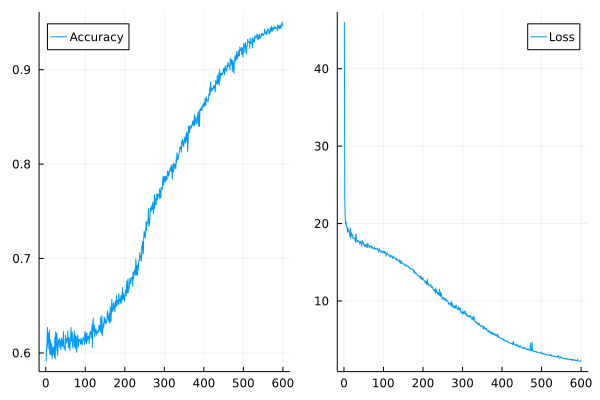

In [9]:
# plot accuracy and loss
p1 = plot(history["accuracy"],label="Accuracy",legend=:topleft)
p2 = plot(history["loss"],label="Loss")
plot(p1,p2,layout=2)

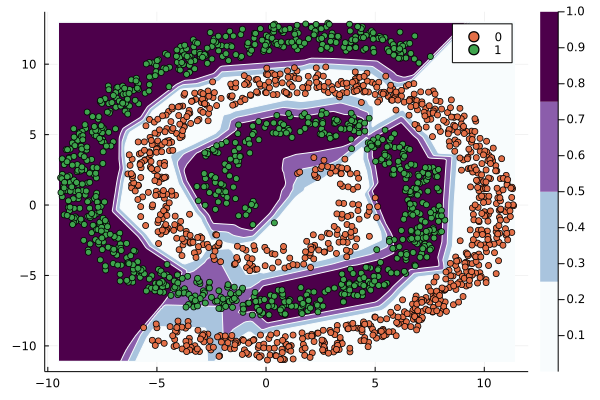

In [10]:
# Plot the decision frontier
plot_decision_boundary(model,xData,yData)